# Business Case

### Problem

The advent of e-news, or electronic news, portals have offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

### Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

with a significant level of 5%, we are required to answer the following questions:

* Do the users spend more time on the new landing page than on the existing landing page?
* Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
* Does the converted status depend on the preferred language?
* Is the time spent on the new page the same for the different language users?

### Data Description

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

* user_id - Unique user ID of the person visiting the website

* group - Whether the user belongs to the first group (control) or the second group (treatment)

* landing_page - Whether the landing page is new or old

* time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

* converted - Whether the user gets converted to a subscriber of the news portal or not

* language_preferred - Language chosen by the user to view the landing page

# Import Libraries

In [3]:
# libraries for manipulating data
import numpy as np
import pandas as pd

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# library for hypothesis testing
import scipy.stats as stats

%matplotlib inline

## Reading the Data into a DataFrame

In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/e-news-express/abtest.csv


In [5]:
df = pd.read_csv('/kaggle/input/e-news-express/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [6]:
# Viewing the first and last few rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [7]:
# Checking the shape of the datasset
df.shape

(100, 6)

In [8]:
# Getting the statistical summary for the variables
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Check for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [10]:
# Check for duplicates
df.duplicated().sum()

0

In [11]:
# check the types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [12]:
# change the types of variables
df.group = df.group.astype('category')
df.landing_page = df.landing_page.astype('category')
df.converted = df.converted.astype('category')
df.language_preferred = df.language_preferred.astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


#### Observation:

* The dataset has 100 rows and 6 columns.
* There are no duplicated entries in the dataset
* There are no missing values in any of the columns
* Variables group, landing_page and converted have only two categories
* There are a total of 100 non-null observations in each of the columns
* There are 6 columns named 'user_id', 'group', 'landing_page', 'time_spent_on_the_page', 'converted', 'language_preferred' whose data types are int64, object, object, float64, object, object respectively 'group', 'landing_page', 'converted', and 'language_preferred' are objects
* It can be observed that the distribution of users in group and landing_page are equal
* More than 50% of users are converted
* There are three categories of languages preferred by users, among which Spanish has been preferred the most by users.
* The user_id column contains the user ID of the person visiting the page.
* The maximum time spent on the landing page is less than 11 minutes.
* The mean time spent on the landing page is approximately 5.4 minutes.
* The median time spent on the landing page is approximately 5.4 minutes.


# Exploratory Data Analysis

## Univariate Analysis

#### 1: univariate analysis of user_id

In [14]:
df['user_id'].nunique()

100

Observation: there are 100 unique users in this dataset

#### 2: univariate analysis of time spent on the page

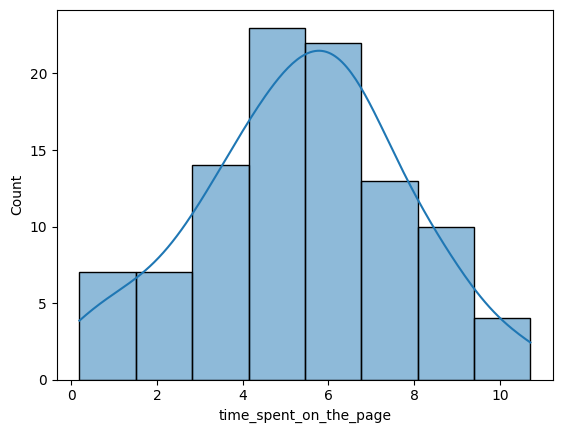

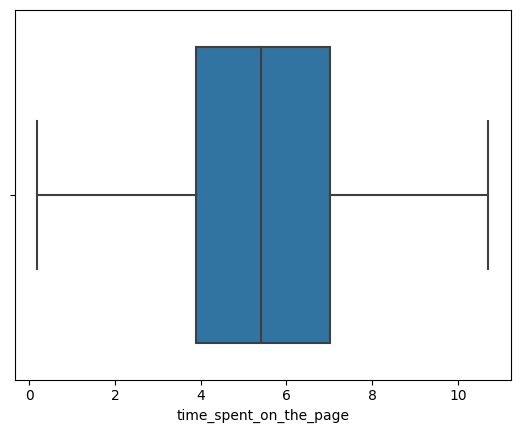

In [15]:
# Univariate analysis of time spent on the page
# check the distribution
sns.histplot(data=df,x=df['time_spent_on_the_page'],kde=True)
plt.show()
# check for outliers
sns.boxplot(data=df,x=df['time_spent_on_the_page'])
plt.show()

observation: the time spent on the page seems to have a distribution that is close to normal. In addition, the boxplot shows that there are no outliers.

#### 3: Univariate analysis of group

In [16]:
df['group'].value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

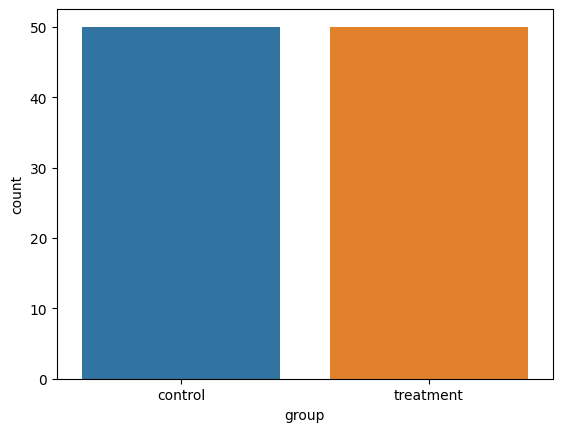

In [17]:
sns.countplot(data=df,x=df['group'])
plt.show()

observation: as it is an AB test of 50/50. It is logical to see that the variable group is split into equal categories. Control category which consists of 50 observations and treatment category which consists of 50 observations.

#### 4: Univariate analysis of landing page

In [18]:
df['landing_page'].value_counts()

landing_page
new    50
old    50
Name: count, dtype: int64

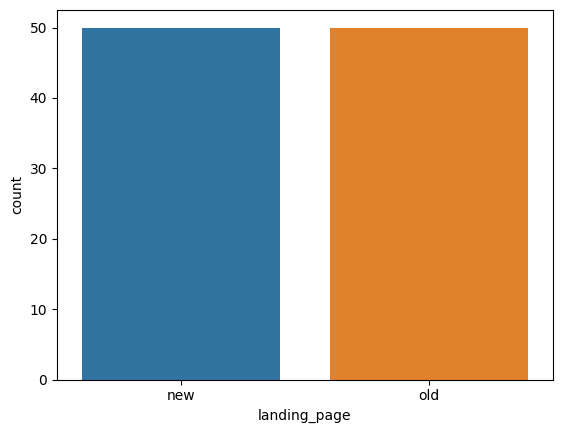

In [19]:
sns.countplot(data=df,x=df['landing_page'])
plt.show()

observation: the same goes for landing page as of group variable. Because the sample was constructed to include 50% of users to view the new landing page and 50% to view the old landing page.

#### 5: Univariate analysis of converted

In [20]:
# number of converted users
df['converted'].value_counts()

converted
yes    54
no     46
Name: count, dtype: int64

In [21]:
# percentage of converted users
df['converted'].value_counts(True)

converted
yes    0.54
no     0.46
Name: proportion, dtype: float64

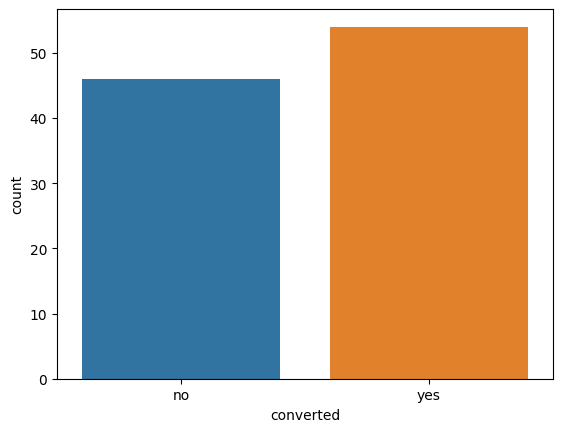

In [22]:
sns.countplot(data=df,x=df['converted'])
plt.show()

observation: 54 (or 54%) of users converted and 46 (46%)  didnt convert.



#### 6: Univariate analysis of language perferred

In [23]:
# number of observations in each category
df['language_preferred'].value_counts()

language_preferred
French     34
Spanish    34
English    32
Name: count, dtype: int64

In [24]:
# percentage of observations in each category
df['language_preferred'].value_counts(True)

language_preferred
French     0.34
Spanish    0.34
English    0.32
Name: proportion, dtype: float64

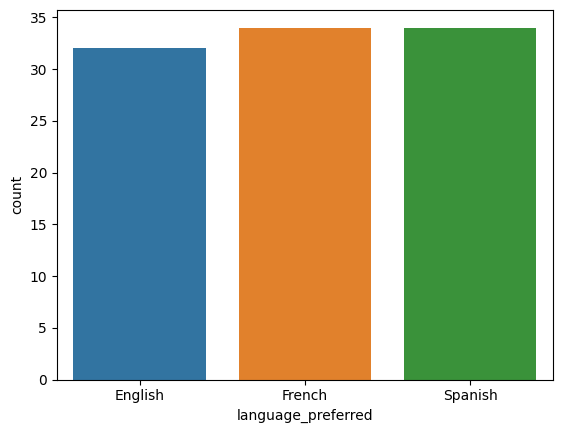

In [25]:
sns.countplot(data=df,x=df['language_preferred'])
plt.show()

observation: Users chose three languages, 32% of them chose English, 34% chose French, and 34% chose Spanish.

## Bivariate Analysis

#### 1:  Time spent on the page vs group

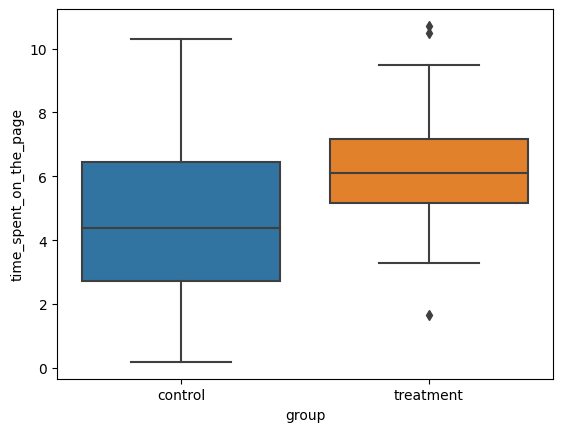

In [26]:
sns.boxplot(data=df,x=df['group'],y=df['time_spent_on_the_page'])
plt.show()

In [29]:
df.groupby(df['group'])['time_spent_on_the_page'].mean()

group
control      4.5324
treatment    6.2232
Name: time_spent_on_the_page, dtype: float64

observation: there is a noticable difference between the time spent on the page between the two groups. For the control group, the average time spent is around 4.5 minutes. Whereas for the treatment group, the average time spent is around 6.2 minutes. Also, 25% of control group users spent between 0-3 minutes approx on the landing page, where 25% of treatment group users spent between 3.5-5.5 minutes approx on the landing page. It is noticable that treatment group users are spending more time than control group users.

#### 2: time spent on the page vs converted

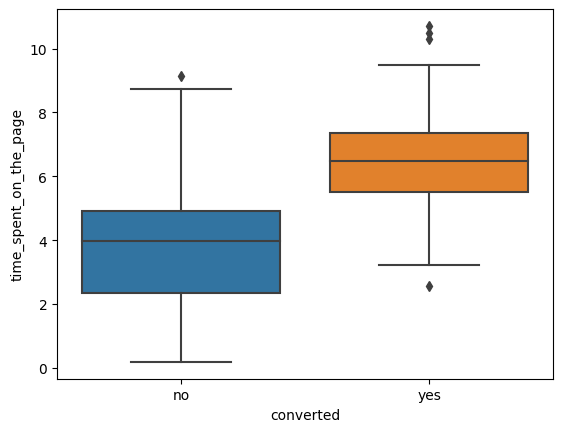

In [27]:
sns.boxplot(data=df,x=df['converted'],y=df['time_spent_on_the_page'])
plt.show()

In [28]:
df.groupby(df['converted'])['time_spent_on_the_page'].mean()

converted
no     3.915870
yes    6.623148
Name: time_spent_on_the_page, dtype: float64

observation: the average time spent by those who did not convert is approximately 3.9 minutes, however, the average time spent by those who converted is around 6.6 minutes. The findings suggest that users who converted had spent more time on the page.

#### 3: time spent on the page vs language preffered

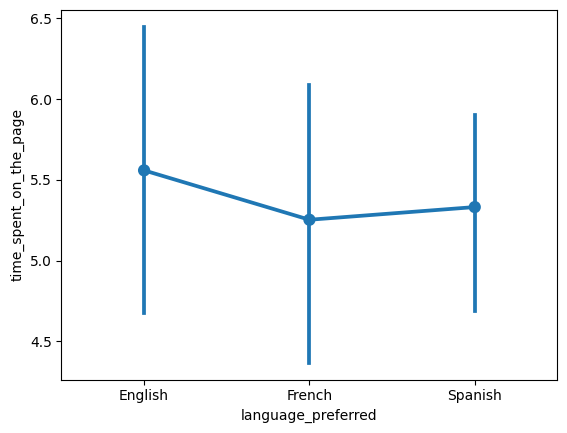

In [29]:
sns.pointplot(data=df,x=df['language_preferred'],y=df['time_spent_on_the_page'])
plt.show()

In [30]:
df.groupby(df['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64

observation: users who chose English have spent (5.6 minutes) on average  on the landing page.  users who chose French have spent (5.3 minutes) on average on the landing page. users who chose Spanish have spent (5.3 minutes) on average on the landing page.

#### 4: time spent on the page vs landing page

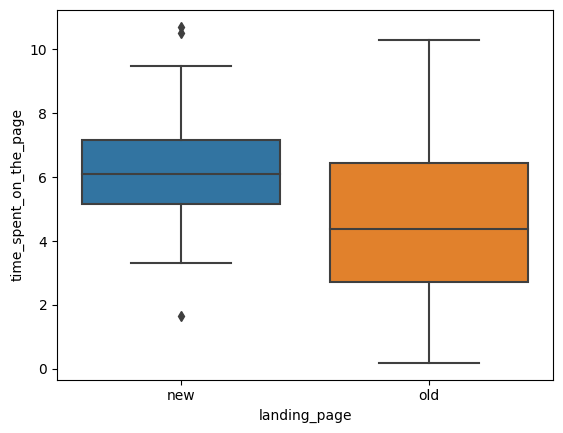

In [31]:
sns.boxplot(data=df,x=df['landing_page'],y=df['time_spent_on_the_page'])
plt.show()

observation: the same conclusion as of group variable is done here. Users who were on the new landing page have spent more time that those who were on the old landing page.

#### 5: group vs convert

In [35]:
df['group'].groupby(df['converted']).value_counts()

converted  group    
no         control      29
           treatment    17
yes        treatment    33
           control      21
Name: count, dtype: int64

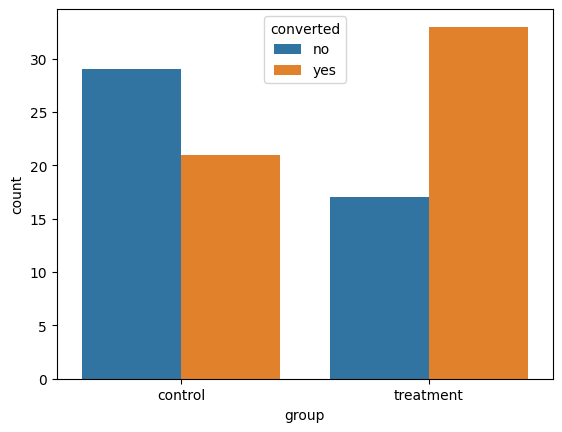

In [32]:
sns.countplot(data=df,x=df['group'],hue=df['converted'])
plt.show()

observation: the number of users who converted is significantly higher in the treatment groups (33) compared to the control groups (21). This implies that the treatment group is better at conversion.

#### 6: group vs language preferred

In [33]:
df['group'].groupby(df['language_preferred']).value_counts()

language_preferred  group    
English             control      16
                    treatment    16
French              control      17
                    treatment    17
Spanish             control      17
                    treatment    17
Name: count, dtype: int64

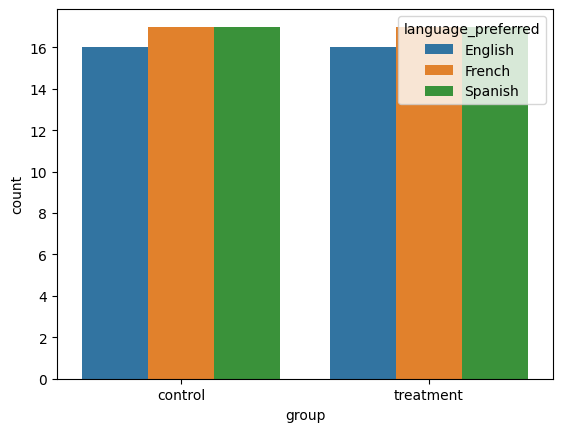

In [34]:
sns.countplot(data=df,x=df['group'],hue=df['language_preferred'])
plt.show()

there is no significant difference between which language the users are choosing and the group they belong to.

#### 7: conversion vs language preferred

In [35]:
df['converted'].groupby(df['language_preferred']).value_counts()

language_preferred  converted
English             yes          21
                    no           11
French              no           19
                    yes          15
Spanish             yes          18
                    no           16
Name: count, dtype: int64

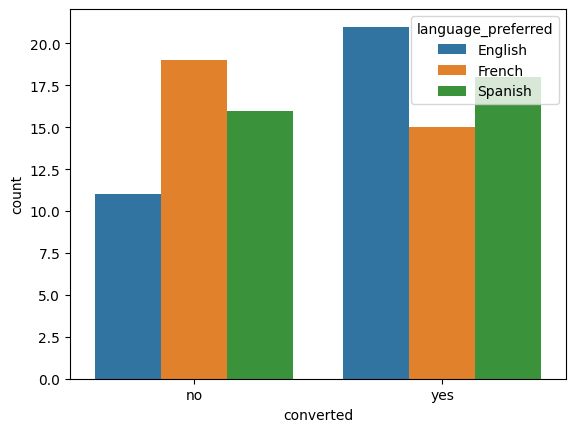

In [36]:
sns.countplot(data=df,x=df['converted'],hue=df['language_preferred'])
plt.show()

observation: users who chose English have the highest conversion (21), then Spanish (18), and lastely French (15).

# **Hypothesis Testing**

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

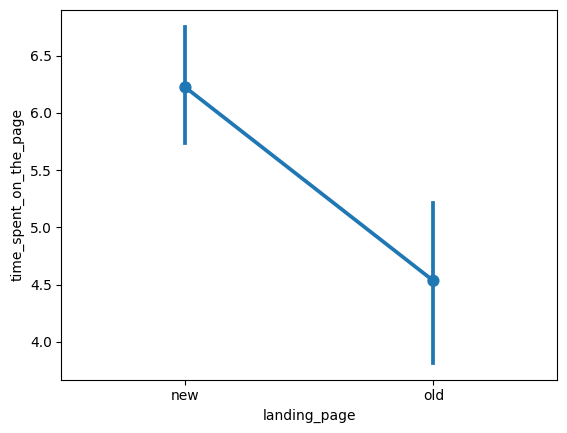

In [40]:
sns.pointplot(data=df,x=df['landing_page'],y=df['time_spent_on_the_page'])
plt.show()


# or use boxplot
#plt.figure(figsize=(8,6))
#sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
#plt.show()

observation: the visual analysis shows that users spend more time on the new landing page than on the old landing page

### Step 1: Define the null and alternate hypotheses

> $H_0:$ The mean time spent by the users on the new page is equal to the mean time spent by the users on the old page. <br>
$H_a:$ The mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.

Let $\mu_1$ and $\mu_2$ be the mean time spent by the users on the new and old page respectively. Then the above formulated hypotheses can be mathematically written as:

> $H_0: \mu_1 = \mu_2 \\
H_a: \mu_1 > \mu_2$

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

### Step 3: Decide the significance level

In [42]:
a = 0.05

### Step 4: Collect and prepare data

In [44]:
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


observation: we can conclude that the standard deviation of the time spent on the page between old and new landing page is NOT equal.

### Step 5: Calculate the p-value

In [45]:
# import the required function
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')
print('The p-value is', p_value)

The p-value is 0.0001392381225166549


#### The p_value of this two sample ttest is 0.000139

### Step 6: Compare the p-value with $\alpha$

In [46]:
# print the conclusion based on p-value

if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')


As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

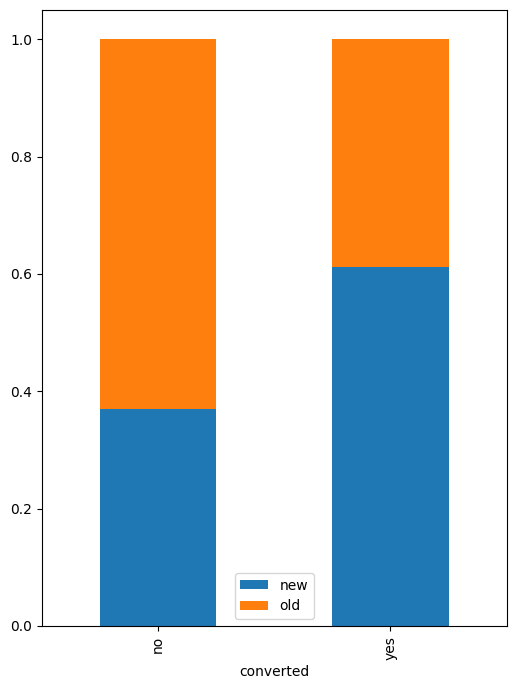

In [50]:
pd.crosstab(df['converted'],df['landing_page'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

observation: the visual analysis shows that the conversion for those who visited the new landing page is greater.

### Step 1: Define the null and alternate hypotheses

> $H_0:$ The conversion rate for the new page is equal to the conversion rate for the old page. <br>
$H_a:$ The conversion rate for the new page is greater than the conversion rate for the old page.

Let $p_1$ and $p_2$ be the conversion rate for the new and old page respectively.

Mathematically, the above formulated hypotheses can be written as:

> $H_0: p_1 = p_2 \\
H_a: p_1 > p_2$

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations. Hence, the two-sample proportion z-test will be the appropriate test for this problem.

### Step 3: Decide the significance level

In [51]:
a2 = 0.05

### Step 4: Collect and prepare data

In [52]:
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']
print('The numbers of converted users for the new and old pages are {0} and {1} respectively'.format(new_converted, old_converted))
n_control = df.group.value_counts()['control'] # number of users in the control group
n_treatment = df.group.value_counts()['treatment'] #number of users in the treatment group
print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of converted users for the new and old pages are 33 and 21 respectively
The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p-value

In [53]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative = 'larger')
print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with  α

In [54]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7: Draw inference

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the conversion rate for the new page is greater than the conversion rate for the old page.


## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

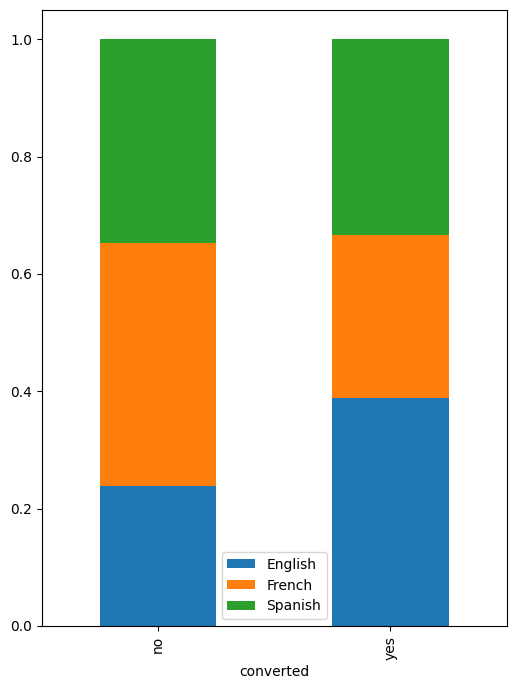

In [55]:
# visual analysis of the dependency between conversion status and preferred langauge
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8),
                 stacked=True)
plt.legend()
plt.show()

observation: it looks like users who choose English have the best conversion.

### Step 1: Define the null and alternate hypotheses

> $H_0:$ The converted status is independent of the preferred language. <br>
$H_a:$ The converted status is not independent of the preferred language.

### Step 2: Select Appropriate test

This is a problem of Chi-square test of independence, concerning the two independent categorical variables, converted status and preferred language.

### Step 3: Decide the significance level

In [56]:
a3 = 0.05

### Step 4: Collect and prepare data

In [57]:
# create the contingency table showing the distribution of two categorical variables
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [58]:
#import the required function
from scipy.stats import chi2_contingency
# use chi2_contingency() to find the p-value
chi_2, p_value, dof, exp_freq = chi2_contingency(contingency_table)
# print the p-value
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with α

In [59]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that the converted status depends on the preferred language

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

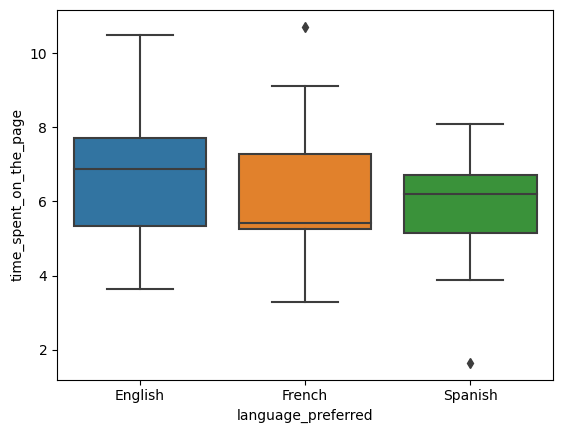

In [60]:
# create a new dataframe which includes only the new page
df_new = df[df['landing_page'] == 'new']
# visualization
sns.boxplot(data=df_new,x=df_new['language_preferred'],y=df_new['time_spent_on_the_page'])
plt.show()

In [61]:
# Checking the mean time spent on the new page for different language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

observation: on the new landing page, users who choose English spend on average 6.66 seconds approximately, users who choose French spend on average 6.19 seconds, and users who choose Spanish spend 5.83 seconds.

### Step 1: Define the null and alternate hypotheses

> $H_0:$ The mean times spent on the new page by English, French, and Spanish users are equal. <br>
$H_a:$ At least one of the mean times spent on the new page by English, French, and Spanish users is unequal.

### Step 2: Select Appropriate test

This is a problem, concerning three population means. One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

#### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [63]:
# Assumption 1: Normality
# import the required function
from scipy.stats import shapiro

# find the p-value
w, p_value = shapiro(df_new['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

#### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [65]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page'],
                             df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page'],
                             df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

### Step 3: Decide the significance level

In [66]:
a4=0.05

### Step 4: Collect and prepare data

In [67]:
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']
time_spent_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [68]:
# import the required function
from scipy.stats import f_oneway
# find the p-value
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)
# print the p-value
print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with α

In [69]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that the mean times spent on the new page by English, French, and Spanish users differ to any meaningful degree.

## Conclusion and Business Recommendations

**Conclusions & Recommendations**


> * **Users spend more time on the new page.**

  - users in the treatment group spent around 6.5 minutes on average on the landing page while control group spent around 4.5 minutes on average. This suggests that the new landing page succeeded at attracting users to spend more time on it than the old landing page.
  - the outline & recommended content of the new page is more likely to keep customers engaged long enough to make a decision to subscribe. Thus, the company is adviced to keep enhancing the new page content.

> * **The conversion rate for the new page is greater than the conversion rate of the old page.**

- which suggests that the new page is more likely to gather new subscribers than the existing page due to the new page success in providing more valuable information and content.

> * **The conversion status is independent of the preferred language.**
- The time spent on the new page does not differ with the language of the content, which suggests that all languages have engagin outline and content.

**In summary, It is recommended that the news company uses the new landing page to gather more subscribers****






___